In [1]:
from util import load_eidc_data

texts = load_eidc_data.load_title_description_lineage('data/catalogue_metadata.json')

In [2]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [3]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedding_model.encode(texts)

In [4]:
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, PartOfSpeech, MaximalMarginalRelevance

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
keybert_model = KeyBERTInspired()
#pos_model = PartOfSpeech('en_core_web_sm')
#mmr_model = MaximalMarginalRelevance(diversity=0.3)
#representation_model={
    #'POS': pos_model,
    #'MMR': mmr_model,
    #'KeyBERT': keybert_model
#}
vectorizer_model = CountVectorizer(stop_words='english', min_df=2, ngram_range=(1,2))
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=keybert_model,
    top_n_words=10,
    verbose=True
    )
topics, probs = topic_model.fit_transform(texts, embeddings)
topic_model.get_topic_info()

2024-06-10 14:58:32,523 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-10 14:59:03,692 - BERTopic - Dimensionality - Completed ✓
2024-06-10 14:59:03,694 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-10 14:59:03,849 - BERTopic - Cluster - Completed ✓
2024-06-10 14:59:03,859 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-10 14:59:29,030 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,531,-1_ecology_butterfly_habitat_index,"[ecology, butterfly, habitat, index, species, ...",[United Kingdom Butterfly Monitoring Scheme: s...
1,0,167,0_countryside survey_uk countryside_habitat da...,"[countryside survey, uk countryside, habitat d...",[Countryside Survey 1998 estimates of Broad Ha...
2,1,135,1_water samples_catchment_catchments_water qua...,"[water samples, catchment, catchments, water q...",[Major ion and nutrient data from rivers [LOIS...
3,2,131,2_soil samples_soils_soil_grassland,"[soil samples, soils, soil, grassland, soil co...","[ Plant biomass, soil conditions and stable is..."
4,3,116,3_tropical forest_forests_rainforest_vegetation,"[tropical forest, forests, rainforest, vegetat...",[Stem respiration in human-modified forests of...
5,4,110,4_river flow_hydrological_catchments_catchment,"[river flow, hydrological, catchments, catchme...",[ Grid-to-Grid model estimates of river flow f...
6,5,85,5_nitrogen deposition_deposition values_ammoni...,"[nitrogen deposition, deposition values, ammon...",[Deposition and concentration values for prote...
7,6,71,6_classification land_classified land_land cov...,"[classification land, classified land, land co...","[Land Cover Map 2022 (10m classified pixels, G..."
8,7,64,7_phytoplankton_water chemistry_chlorophyll_ox...,"[phytoplankton, water chemistry, chlorophyll, ...","[Surface temperature, surface oxygen, water cl..."
9,8,58,8_pollination_bees_pollinators_flowering,"[pollination, bees, pollinators, flowering, pl...",[The seed set of supplemented and pollinator e...


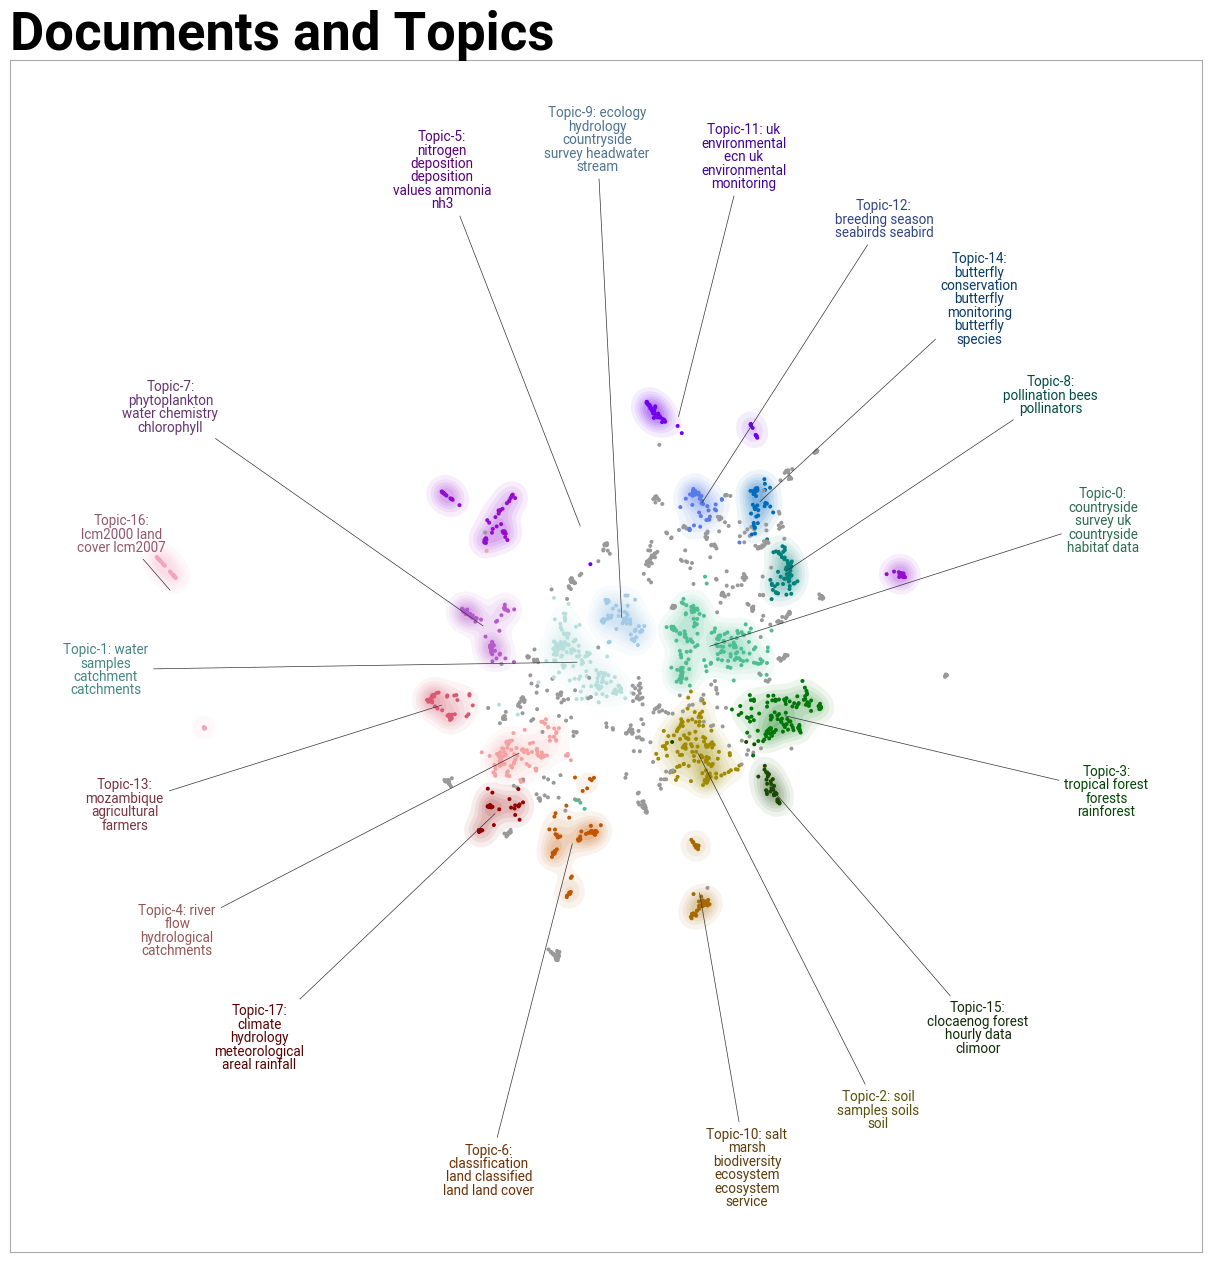

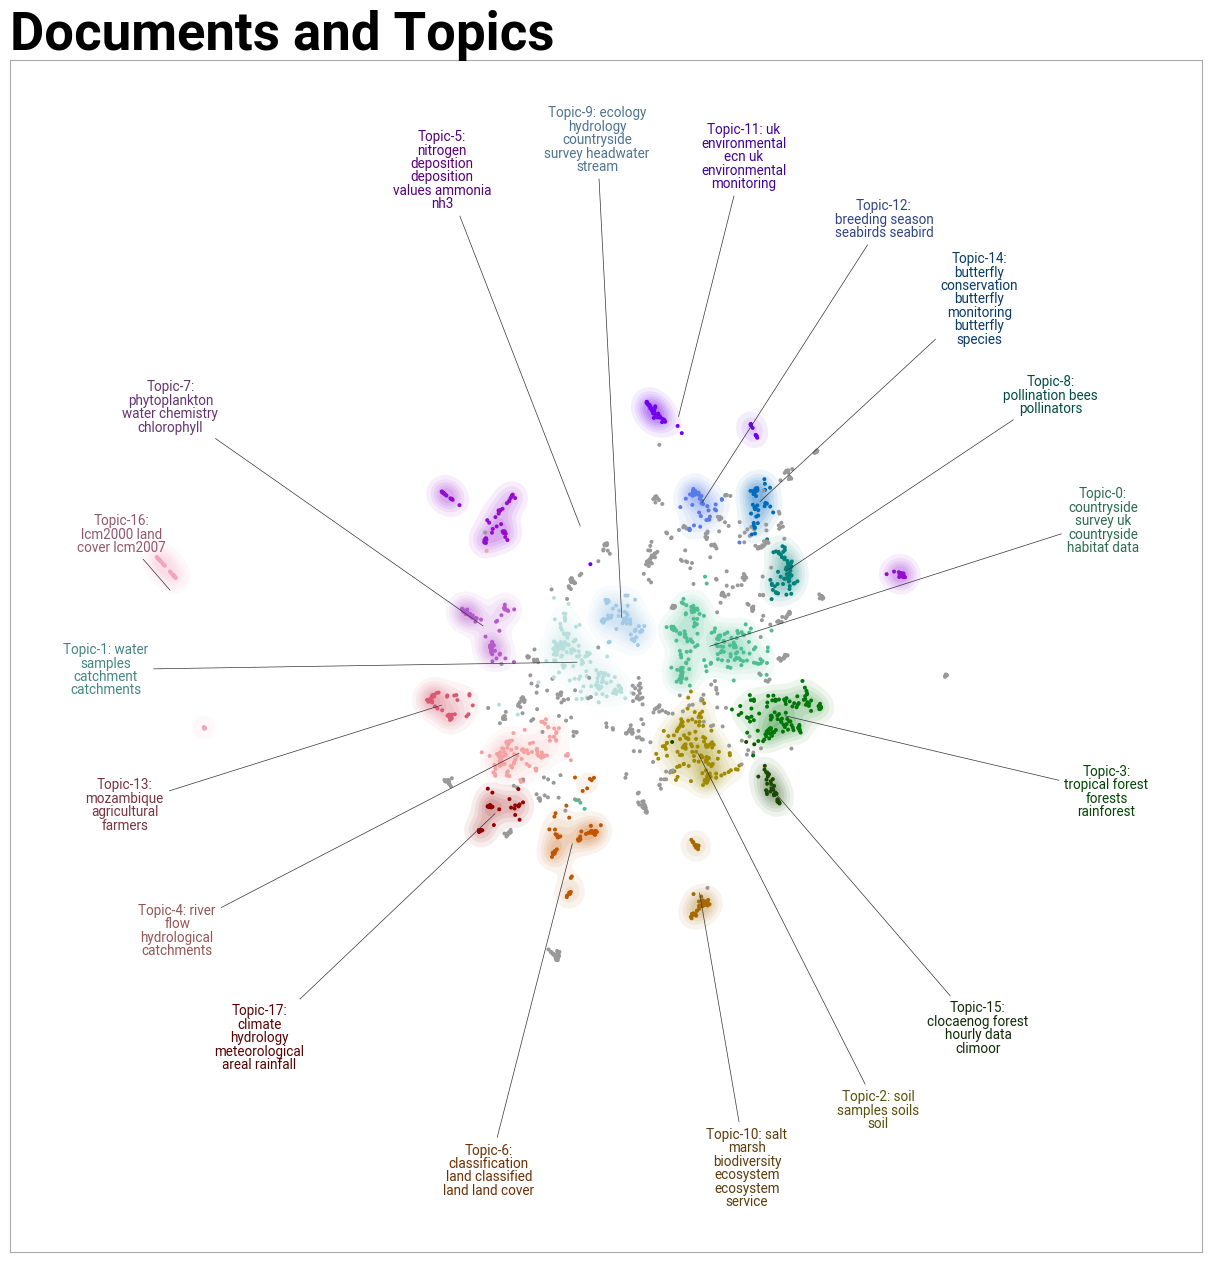

In [5]:
topic_model.visualize_document_datamap(texts, embeddings=embeddings)

In [6]:
topic_model.visualize_barchart()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4668833017349243, 0.5124947428703308, 0.5450255870819092,
                    0.6168781518936157, 0.6976462602615356],
              'xaxis': 'x',
              'y': [grassland  , countryside  , habitat data  , uk countryside  ,
                    countryside survey  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4859740138053894, 0.4862130880355835, 0.522254467010498,
                    0.5409697890281677, 0.5865721702575684],
              'xaxis': 'x2',
              'y': [water chemistry  , water quality  , catchments  , catchment  ,
                    water samples  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4601687490940094, 0.47015732526779175, 0.5185772180557251,
                    0.5236619710922241, 0.6159202456474304],
              'xaxis': 'x3',
              'y': [soil cores  , grassland  , soil  , soils  , soil samples  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4960694909095764, 0.5163700580596924, 0.5259759426116943,
                    0.5269113779067993, 0.6068782806396484],
              'xaxis': 'x4',
              'y': [forest  , vegetation  , rainforest  , forests  , tropical
                    forest  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.3546357750892639, 0.45399174094200134, 0.4604087471961975,
                    0.4659291207790375, 0.5023826956748962],
              'xaxis': 'x5',
              'y': [1km grid  , catchment  , catchments  , hydrological  , river
                    flow  ],
              'yaxis': 'y5'},
             {'marker': {'color': '#009E73'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.3438225984573364, 0.35701900720596313, 0.35875260829925537,
                    0.3696770668029785, 0.4561910331249237],
              'xaxis': 'x6',
              'y': [concentrations  , pollutants  , ammonia nh3  , deposition
                    values  , nitrogen deposition  ],
              'yaxis': 'y6'},
             {'marker': {'color': '#F0E442'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.47423940896987915, 0.5775260925292969, 0.5808910131454468,
                    0.5833749771118164, 0.6499184370040894],
              'xaxis': 'x7',
              'y': [uk biodiversity  , land surface  , land cover  , classified
                    land  , classification land  ],
              'yaxis': 'y7'},
             {'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.423296183347702, 0.438068151473999, 0.47491711378097534,
                    0.49204421043395996, 0.5193472504615784],
              'xaxis': 'x8',
              'y': [freshwater ecology  , oxygen water  , chlorophyll  , water
                    chemistry  , phytoplankton  ],
              'yaxis': 'y8'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 0',
                                'x': 0.0875,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                     